# How Err on F impacts Deviation and Accuracy (Many Sets)

In [5]:
import utilities as uts #general utilities that are useful for all methods
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

df = pd.read_csv("dvcs_bkm_xs_June2021_4pars.csv")
data = uts.DvcsData(df)

#Get real CFF values for Kinematic Sets Chosen
def getRealValues(sets, numPhi = 45):
    realValues = []
    for s in sets: 
        ReH, ReE, ReHtilde = df.loc[numPhi * s, 'gReH': 'gReHTilde']
        realValues.append([ReH, ReE, ReHtilde])

    return realValues

#Calculates mean and std of distribution from model
def calcMeanAndStd(data):
    return [[round(np.mean(data.ReH), 4), round(np.mean(data.ReE), 4), round(np.mean(data.ReHtilde), 4)], [round(np.std(data.ReH), 4), round(np.std(data.ReE), 4), round(np.std(data.ReHtilde), 4)]]

#Plots histogram with distribution and real values for a certain kinematic set
def plotHis(data, realValues, setNum, buckets = [10, 10, 10], sameAxes = True):
    plt.hist(data.ReHtilde, bins = buckets[2])
    plt.hist(data.ReE, bins = buckets[1])
    plt.hist(data.ReH, bins = buckets[0])

    plt.title(str(setNum) + " Distribution")
    plt.legend(["ReHtilde", "ReE", "ReH"])

    if sameAxes: 
        plt.xlim(xmin=-70, xmax = 20)    
    
    plt.axvline(x=realValues[0], ymin=0, ymax=500, color = '#1a601b')
    plt.axvline(x=realValues[1], ymin=0, ymax=500, color = '#7f3f07')
    plt.axvline(x=realValues[2], ymin=0, ymax=500, color = '#0c3049')

sets = [11, 98, 137, 264, 311, 402]
realValues = getRealValues(sets, numPhi=45)

def getData(errValues, setNum):
    ReHSTD = []
    ReESTD = []
    ReHtildeSTD = []

    ReHMean = []
    ReEMean = []
    ReHtildeMean = []

    idx = sets.index(setNum)

    for err in errValues: 
        data = pd.read_csv("Predictions\Other Sets\Sets312_99\Method2-"+ str(setNum) + "-" + str(err) +  ".csv")
        ReHSTD.append(round(np.std(data.ReH), 4))
        ReESTD.append(round(np.std(data.ReE), 4))
        ReHtildeSTD.append(round(np.std(data.ReHtilde), 4))

        ReHMean.append(abs(round(realValues[idx][0] - np.mean(data.ReH), 4)))
        ReEMean.append(abs(round(realValues[idx][1] - np.mean(data.ReE), 4)))
        ReHtildeMean.append(abs(round(realValues[idx][2] - np.mean(data.ReHtilde), 4)))

    return ReHSTD, ReESTD, ReHtildeSTD, ReHMean, ReEMean, ReHtildeMean

def plot(errValues, setNum):
    ReHSTD, ReESTD, ReHtildeSTD, ReHMean, ReEMean, ReHtildeMean = getData(errValues, setNum)
    fig, axes = plt.subplots(1, 3)
    fig.suptitle('Set ' + str(setNum + 1))
    axes[0].set_title('ReH')
    axes[0].plot(errValues, ReHMean, 'x')
    axes[0].plot(errValues, ReHSTD, 'o', color = '#1f77b4')

    axes[1].plot(errValues, ReEMean, 'x')
    axes[1].plot(errValues, ReESTD, 'o', color = 'orange')
    axes[1].set_title('ReE')

    axes[2].plot(errValues, ReHtildeMean, 'x')
    axes[2].plot(errValues, ReHtildeSTD, 'o', color = 'green')
    axes[2].set_title('ReHtilde')

    for ax in axes:
        ax.set(xlabel='errF')

    fig.set_size_inches(18.5, 4.5, forward=True)

errValues = [0.0, 0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2, 0.25, 0.35, 0.5]

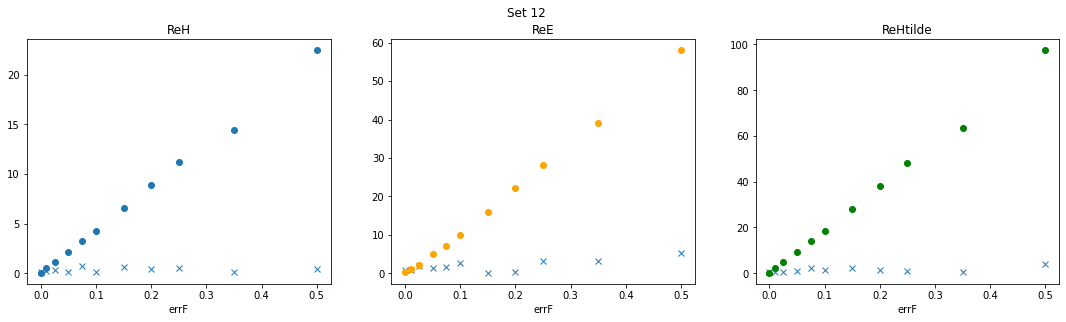

In [54]:
plot(errValues, 11)

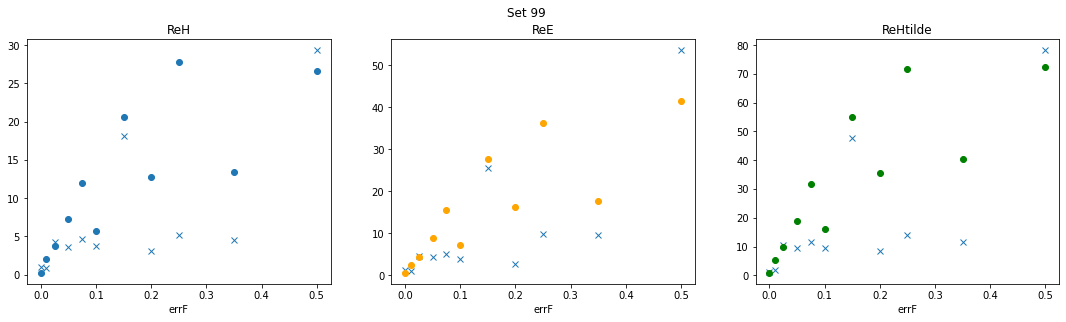

In [55]:
plot(errValues, 98)

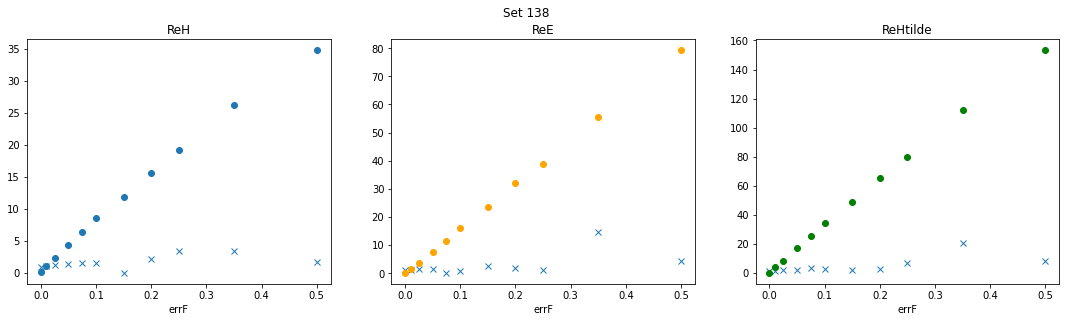

In [56]:
plot(errValues, 137)

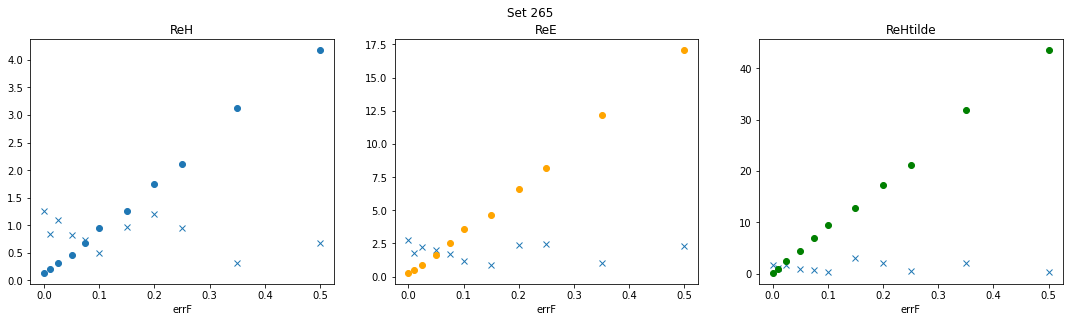

In [57]:
plot(errValues, 264)

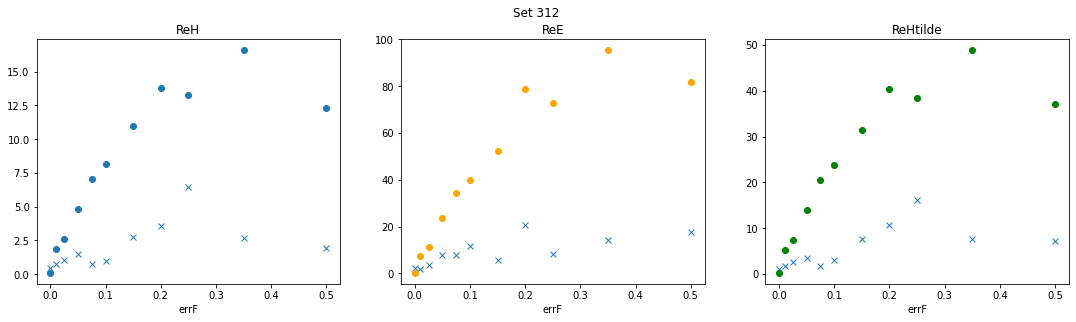

In [58]:
plot(errValues, 311)

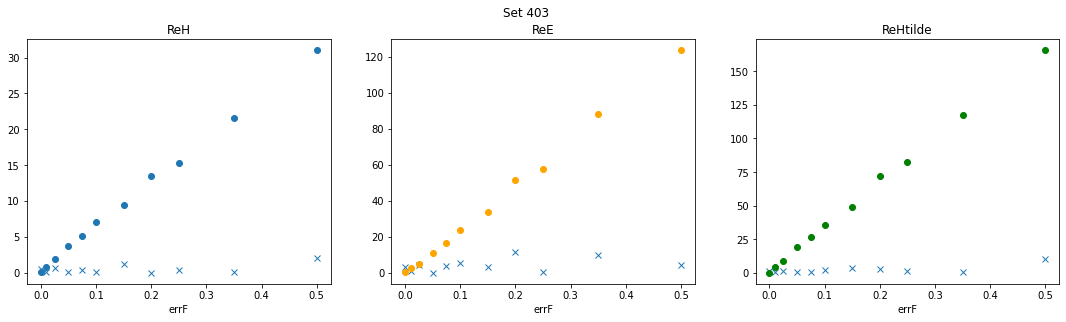

In [59]:
plot(errValues, 402)

Seeing whether results for set 312 and 99 are consistent

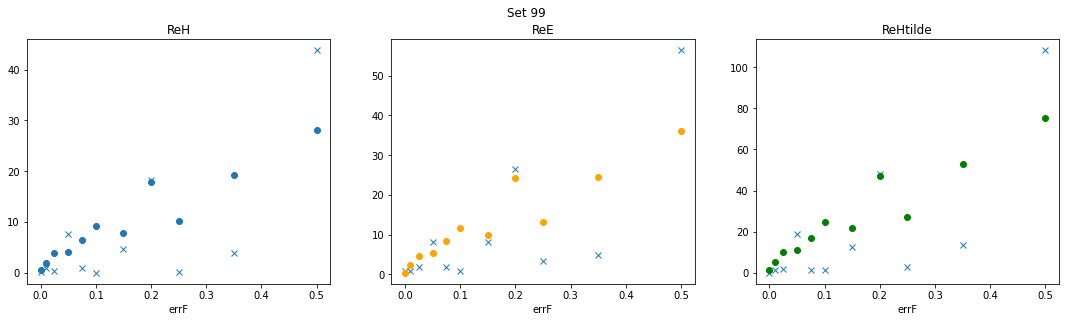

In [6]:
plot(errValues, 98)

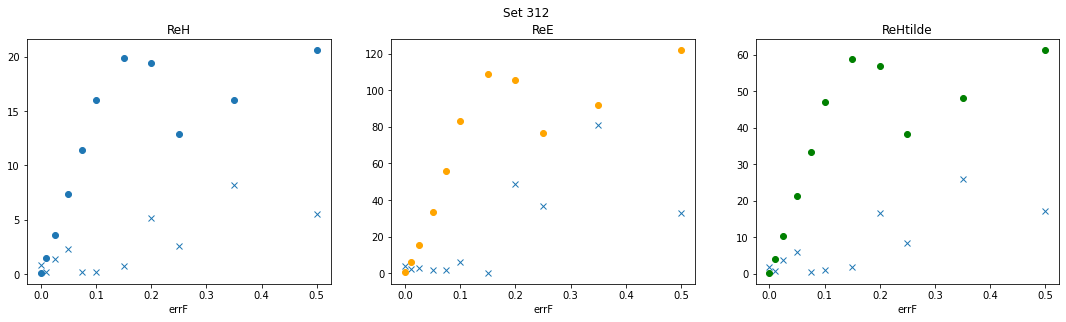

In [7]:
plot(errValues, 311)